# Task 3

# Load the Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('IMA2025_Facebook_Aprilia_MainData.xlsx', sheet_name='DB')

# Data Cleaning

Removing the Hashtags and creating an own column.

In [3]:
import re

def extract_hashtags(content):
    if isinstance(content, str):
        hashtags = re.findall(r'#\w+', content)
        return ', '.join(hashtags)
    return None

df['Hashtags'] = df['Content'].apply(extract_hashtags)
df['Content'] = df['Content'].str.replace(r'#\w+', '', regex=True).str.strip()

In this task we only focus on Video Attention. Therefore we filter the dataset to only contain videos.

In [4]:
dff = df[df['Media'] == 'video']

Below, I am examining the video lenghts.

In [5]:
dff_sorted = dff['Video length (sec)'].value_counts().sort_index()
dff_sorted

Video length (sec)
0.0        1
5.0       19
7.0        9
8.0        3
9.0        1
          ..
3919.0     1
4032.0     1
4066.0     1
5809.0     1
6163.0     1
Name: count, Length: 102, dtype: int64

In [6]:
long = dff_sorted[dff_sorted.index > 1000]
len(long)

6

In [7]:
dff['Racing_d'] = dff['Racing'].notna().astype(int)

/var/folders/b0/h1xx55fn0m7f9j3k4jxny4nm0000gn/T/ipykernel_2063/3808609439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Racing_d'] = dff['Racing'].notna().astype(int)


# EDA

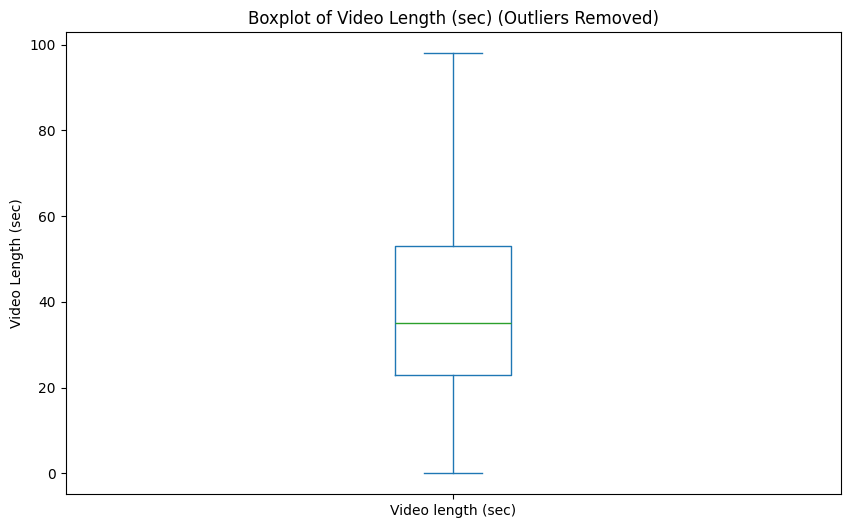

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dff['Video length (sec)'].plot(kind='box', showfliers=False)
plt.title('Boxplot of Video Length (sec) (Outliers Removed)')
plt.ylabel('Video Length (sec)')
plt.show()


To make the explaratory data analysis more straight forward I remove most of the outliers in terms of video length in the cell below.

In [9]:
filtered_dff = dff[dff['Video length (sec)'] < 100]

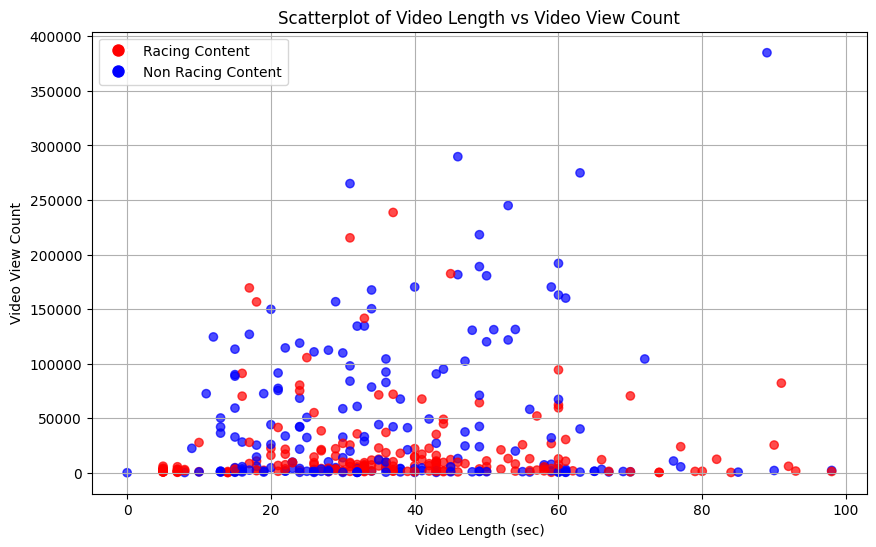

In [10]:
plt.figure(figsize=(10, 6))
colors = filtered_dff['Racing_d'].map({1: 'red', 0: 'blue'})
plt.scatter(filtered_dff['Video length (sec)'], filtered_dff['Video view count'], c=colors, alpha=0.7, label='Data Points')
plt.title('Scatterplot of Video Length vs Video View Count')
plt.xlabel('Video Length (sec)')
plt.ylabel('Video View Count')
plt.grid(True)

red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Racing Content', markerfacecolor='red', markersize=10)
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Non Racing Content', markerfacecolor='blue', markersize=10)
plt.legend(handles=[red_patch, blue_patch])

plt.show()

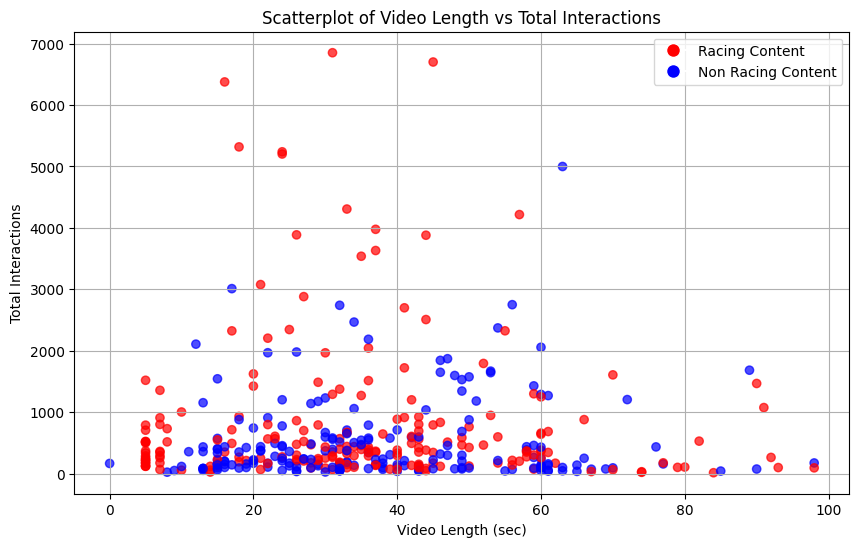

In [11]:
plt.figure(figsize=(10, 6))
colors = filtered_dff['Racing_d'].map({1: 'red', 0: 'blue'})
plt.scatter(filtered_dff['Video length (sec)'], filtered_dff['Total interactions'], c=colors, alpha=0.7, label='Data Points')
plt.title('Scatterplot of Video Length vs Total Interactions')
plt.xlabel('Video Length (sec)')
plt.ylabel('Total Interactions')
plt.grid(True)

red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Racing Content', markerfacecolor='red', markersize=10)
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Non Racing Content', markerfacecolor='blue', markersize=10)
plt.legend(handles=[red_patch, blue_patch])

plt.show()

Below, I am comparing the average watch time with the average video length for both racing and non racing content.

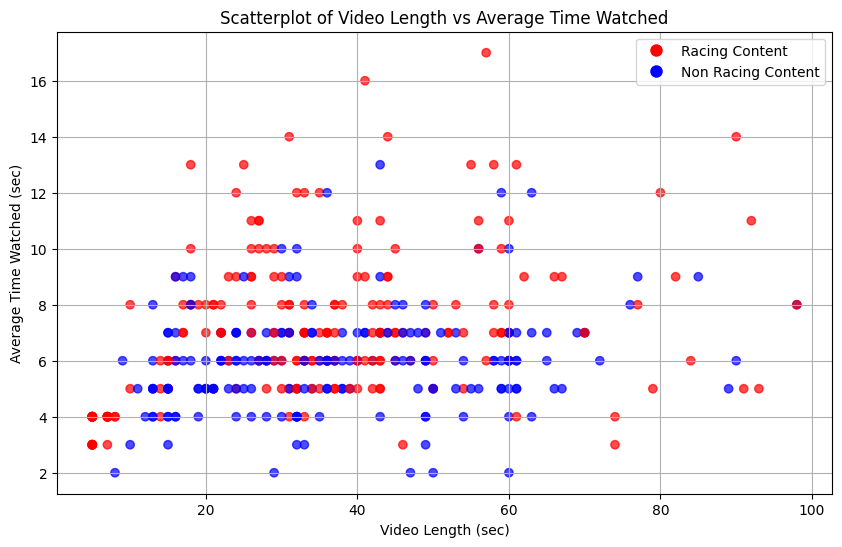

In [12]:
plt.figure(figsize=(10, 6))
colors = filtered_dff['Racing_d'].map({1: 'red', 0: 'blue'})
plt.scatter(filtered_dff['Video length (sec)'], filtered_dff['Average time watched (sec)'], c=colors, alpha=0.7, label='Data Points')
plt.title('Scatterplot of Video Length vs Average Time Watched')
plt.xlabel('Video Length (sec)')
plt.ylabel('Average Time Watched (sec)')
plt.grid(True)

red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Racing Content', markerfacecolor='red', markersize=10)
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Non Racing Content', markerfacecolor='blue', markersize=10)
plt.legend(handles=[red_patch, blue_patch])

plt.show()

/var/folders/b0/h1xx55fn0m7f9j3k4jxny4nm0000gn/T/ipykernel_2063/4117995961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dff['Duration Category'] = pd.cut(


<Figure size 1200x600 with 0 Axes>

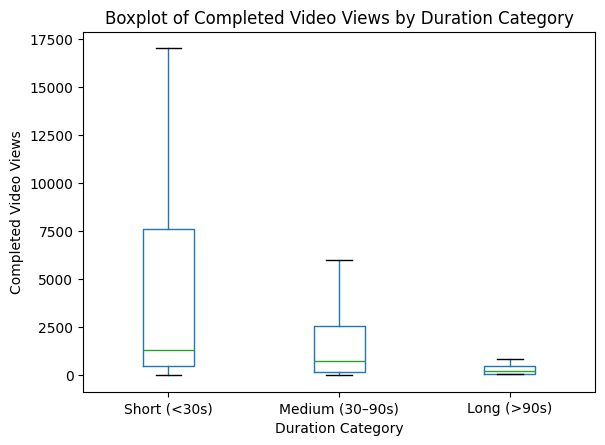

<Figure size 1200x600 with 0 Axes>

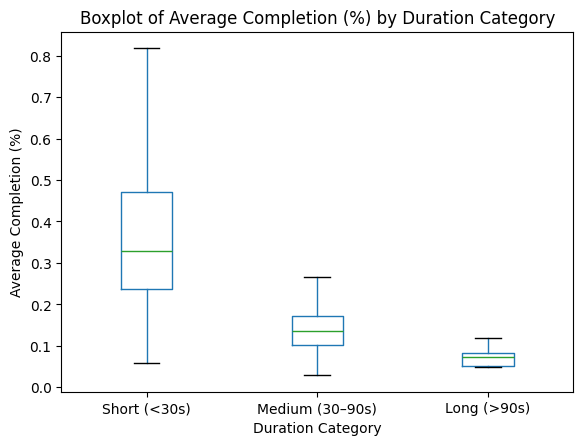

In [13]:
filtered_dff['Duration Category'] = pd.cut(
    filtered_dff['Video length (sec)'],
    bins=[0, 30, 90, float('inf')],
    labels=['Short (<30s)', 'Medium (30–90s)', 'Long (>90s)']
)

plt.figure(figsize=(12, 6))
filtered_dff.boxplot(column='Completed video views', by='Duration Category', showfliers=False)
plt.title('Boxplot of Completed Video Views by Duration Category')
plt.suptitle('') 
plt.xlabel('Duration Category')
plt.ylabel('Completed Video Views')
plt.grid(False)
plt.show()

plt.figure(figsize=(12, 6))
filtered_dff.boxplot(column='Average completion (%)', by='Duration Category', showfliers=False)
plt.title('Boxplot of Average Completion (%) by Duration Category')
plt.suptitle('') 
plt.xlabel('Duration Category')
plt.ylabel('Average Completion (%)')
plt.grid(False)
plt.show()

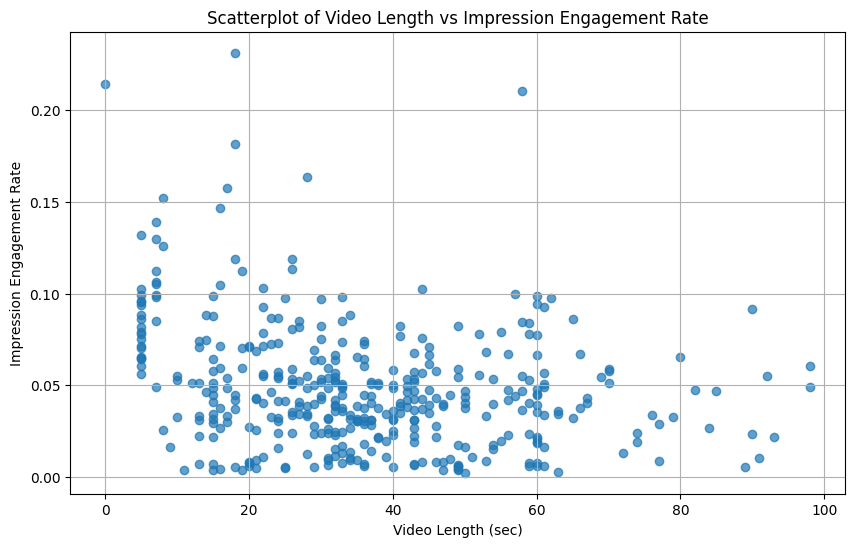

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_dff['Video length (sec)'], filtered_dff['Impressions engagement rate'], alpha=0.7)
plt.title('Scatterplot of Video Length vs Impression Engagement Rate')
plt.xlabel('Video Length (sec)')
plt.ylabel('Impression Engagement Rate')
plt.grid(True)
plt.show()

In [15]:
relevant_cols = [
    "Average time watched (sec)", "Completed video views", "Average completion (%)",
    "Total interactions", "Post clicks", "Link clicks", "Total shares", "Total comments"
]
df_videos = filtered_dff[relevant_cols].dropna()

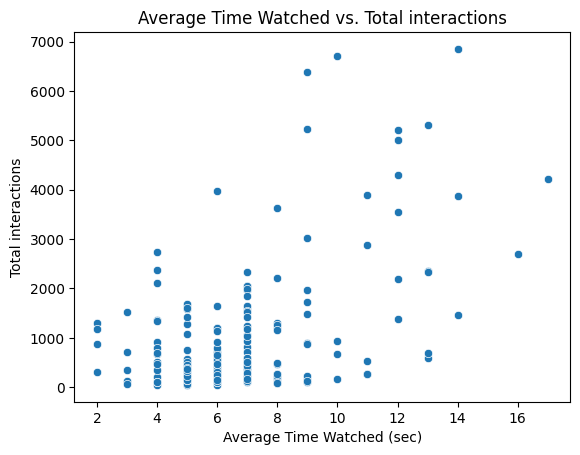

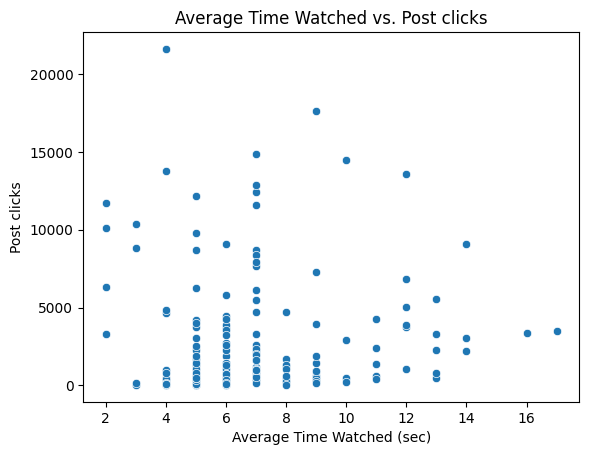

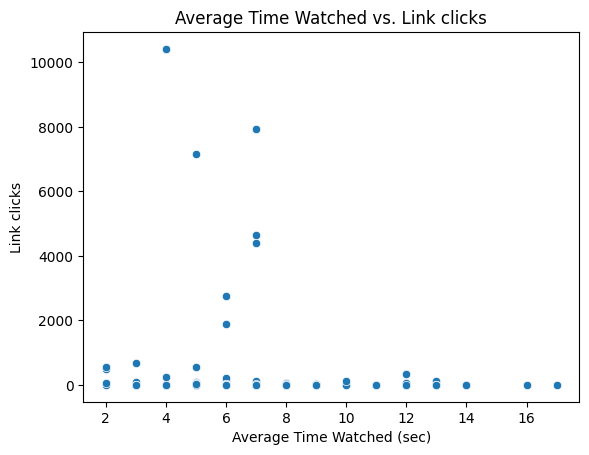

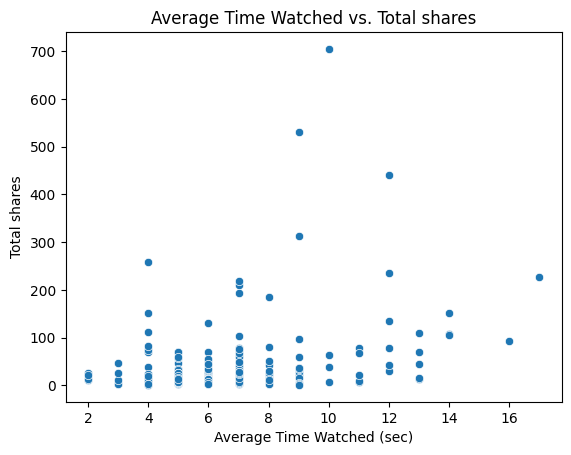

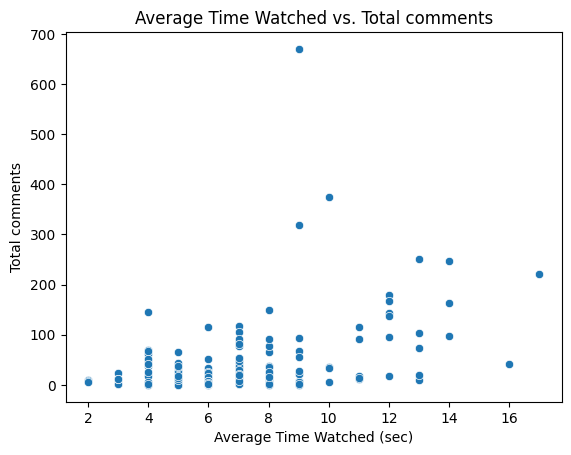

In [16]:
engagement_vars = ["Total interactions", "Post clicks", "Link clicks", "Total shares", "Total comments"]

for var in engagement_vars:
    sns.scatterplot(data=df_videos, x="Average time watched (sec)", y=var)
    plt.title(f"Average Time Watched vs. {var}")
    plt.xlabel("Average Time Watched (sec)")
    plt.ylabel(var)
    plt.show()


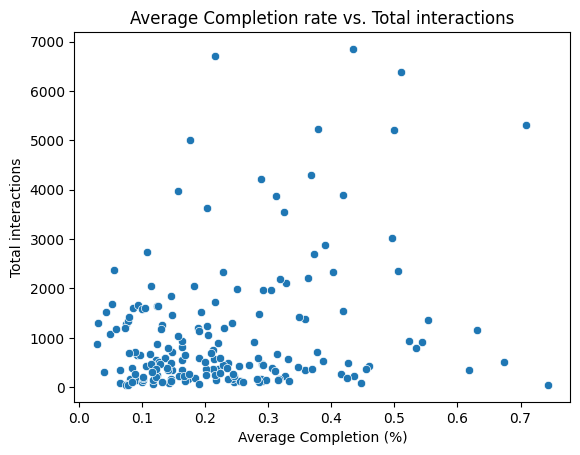

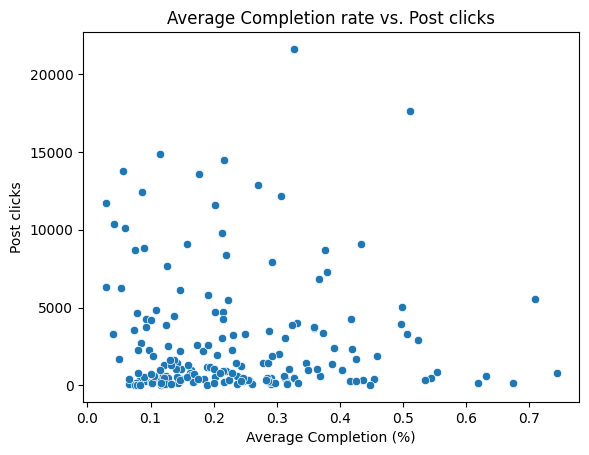

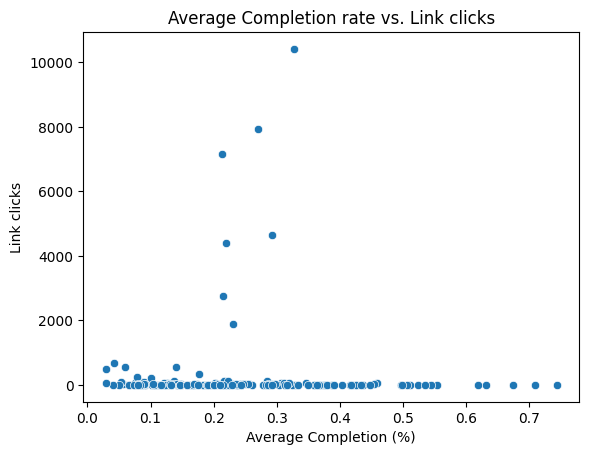

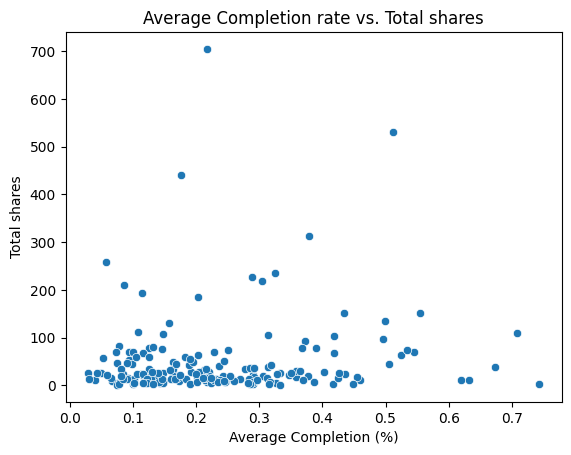

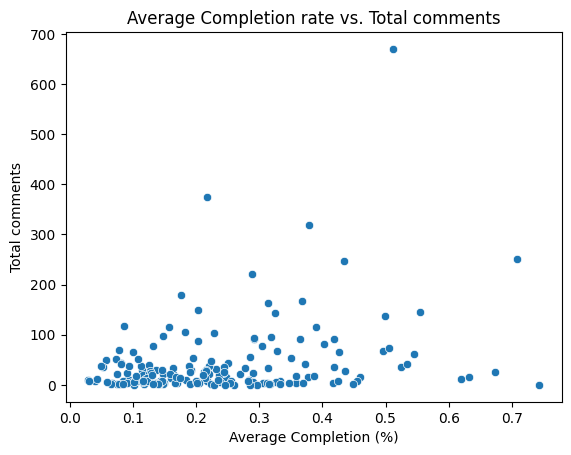

In [17]:
engagement_vars = ["Total interactions", "Post clicks", "Link clicks", "Total shares", "Total comments"]

for var in engagement_vars:
    sns.scatterplot(data=df_videos, x="Average completion (%)", y=var)
    plt.title(f"Average Completion rate vs. {var}")
    plt.xlabel("Average Completion (%)")
    plt.ylabel(var)
    plt.show()


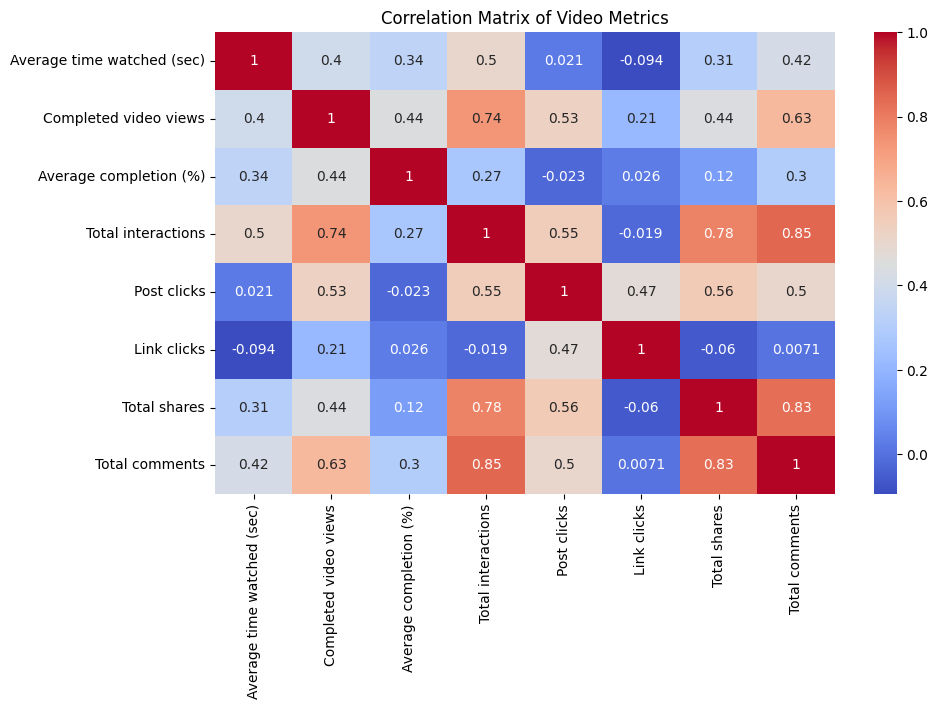

In [18]:
import seaborn as sns

correlation_matrix = df_videos.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Video Metrics")
plt.show()


In [19]:
df_filtered = df[df['Hashtags'].str.strip() != '']
df_filtered = df_filtered.copy()
df_filtered['Hashtags'] = df_filtered['Hashtags'].str.split(', ')
df_exploded = df_filtered.explode('Hashtags')
average_interactions = df_exploded.groupby('Hashtags')['Total interactions'].mean().reset_index()
average_interactions = average_interactions.sort_values(by='Total interactions', ascending=False)
print(average_interactions)

                         Hashtags  Total interactions
93                          #JM89              6375.0
192                 #SimplyTheBez              5238.0
146        #ProfessionistidelMare              4999.0
140             #NoiSiamolaMarina              4999.0
44   #BahrainInternationalCircuit              4741.0
..                            ...                 ...
77                          #GenZ                32.0
130                 #MotoGPeSport                24.2
64                      #EURO2024                17.0
76                        #Gaming                12.4
131                #MotoGPeSports                11.0

[265 rows x 2 columns]


Now, we also want to take a look if there are differences between the different Hashtags we extracted.

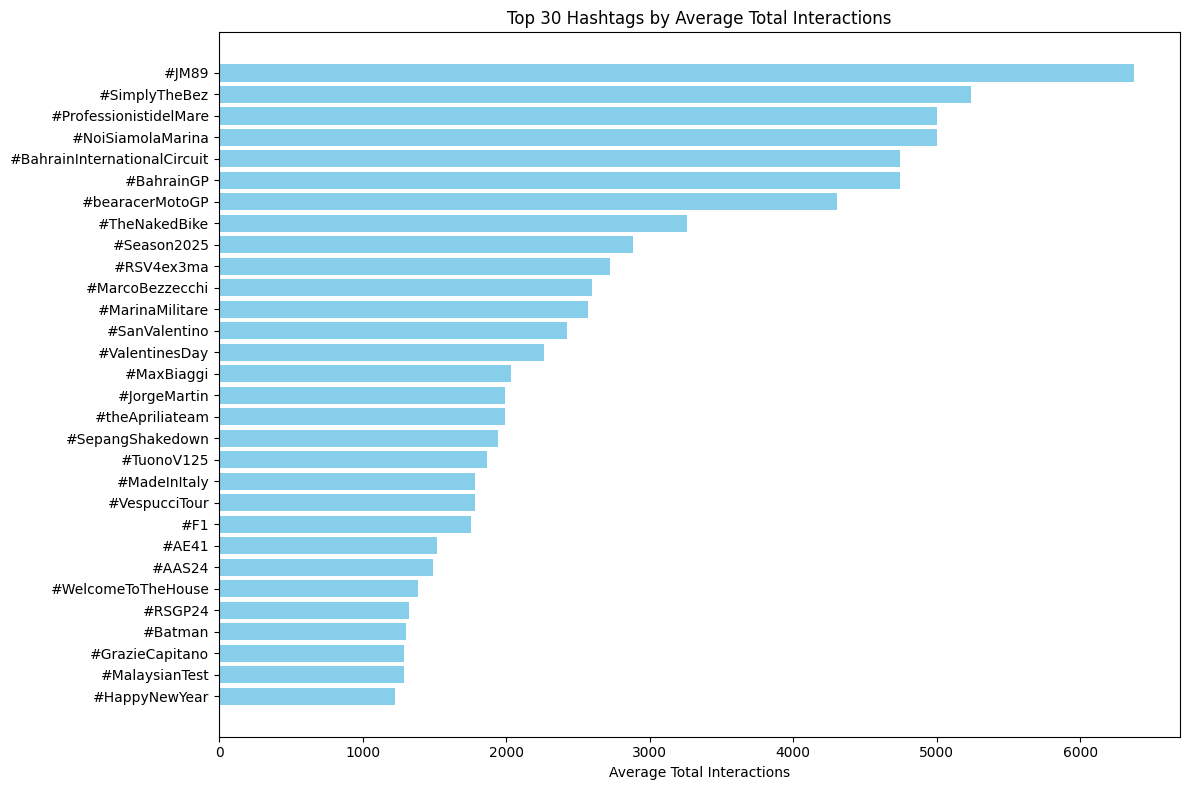

In [20]:
top_30 = average_interactions.sort_values(by='Total interactions', ascending=False).head(30)
plt.figure(figsize=(12, 8))
plt.barh(top_30['Hashtags'], top_30['Total interactions'], color='skyblue')
plt.xlabel('Average Total Interactions')
plt.title('Top 30 Hashtags by Average Total Interactions')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


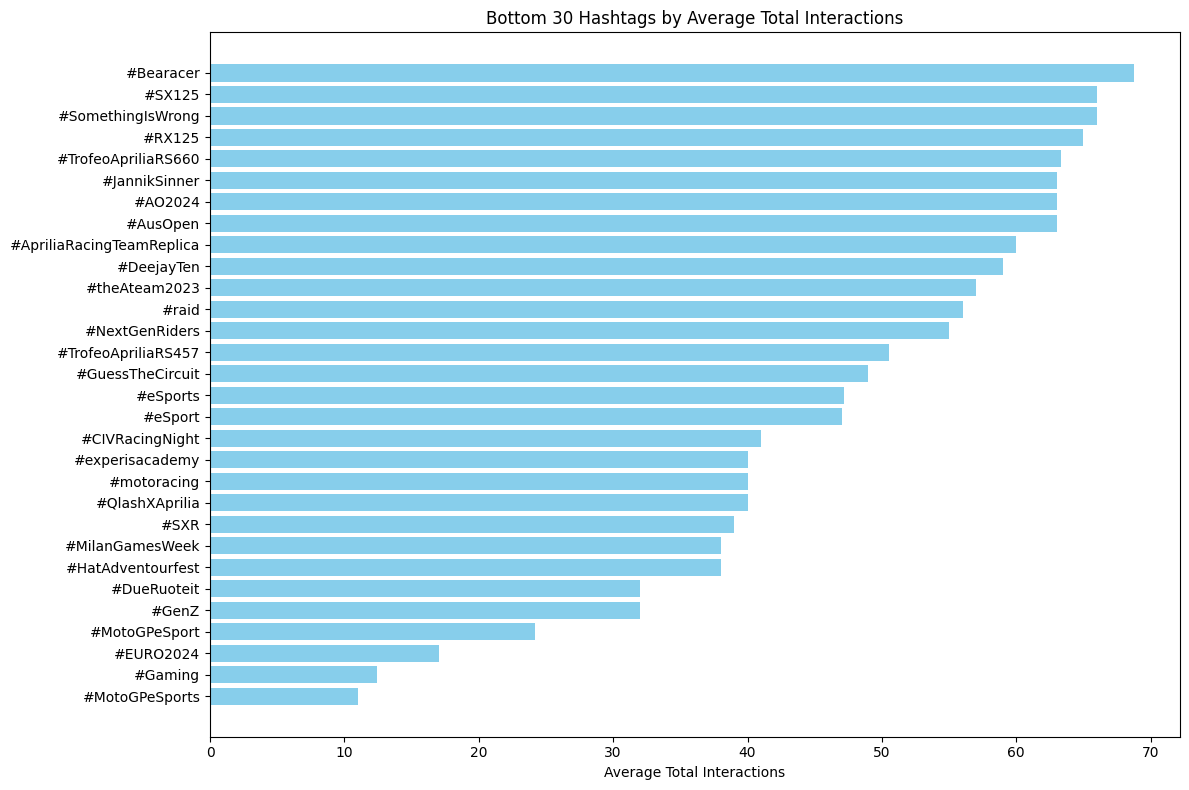

In [21]:
lowest_30 = average_interactions.sort_values(by='Total interactions', ascending=False).tail(30)

plt.figure(figsize=(12, 8))
plt.barh(lowest_30['Hashtags'], lowest_30['Total interactions'], color='skyblue')
plt.xlabel('Average Total Interactions')
plt.title('Bottom 30 Hashtags by Average Total Interactions')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


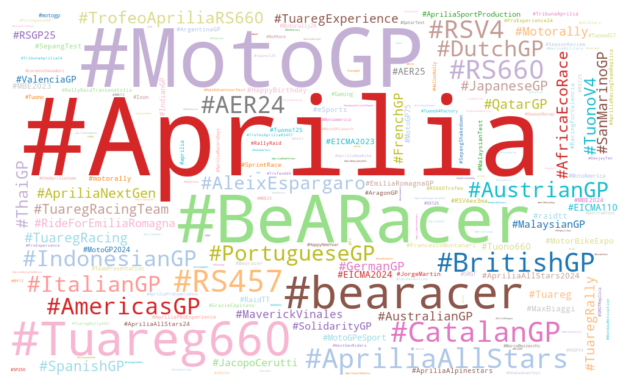

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_filtered = df[df['Hashtags'].str.strip() != ''].copy()
df_filtered['Hashtags'] = df_filtered['Hashtags'].str.split(', ')
df_exploded = df_filtered.explode('Hashtags')
hashtag_counts = df_exploded['Hashtags'].value_counts()
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='tab20', collocations=False)
wordcloud.generate_from_frequencies(frequencies=hashtag_counts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


# Regressions

Below, I am trying several Regressions. The variables indicating the time spent or clicks for videos seem to have a high colinearity.

In [23]:
import statsmodels.api as sm

X = filtered_dff['Video length (sec)']
y = filtered_dff['Video view count']
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Video view count   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.625
Date:                Sun, 11 May 2025   Prob (F-statistic):             0.0321
Time:                        14:02:28   Log-Likelihood:                -4879.8
No. Observations:                 396   AIC:                             9764.
Df Residuals:                     394   BIC:                             9771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.13e+04   5735

In [24]:
import statsmodels.formula.api as smf
df_reg = dff[["Video length (sec)", "Video view count"]].dropna()
model = smf.ols(formula="Q('Video view count') ~ Q('Video length (sec)')", data=df_reg).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Q('Video view count')   R-squared:                       0.004
Model:                               OLS   Adj. R-squared:                  0.002
Method:                    Least Squares   F-statistic:                     1.677
Date:                   Sun, 11 May 2025   Prob (F-statistic):              0.196
Time:                           14:02:28   Log-Likelihood:                -5185.4
No. Observations:                    421   AIC:                         1.037e+04
Df Residuals:                        419   BIC:                         1.038e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [25]:
import statsmodels.formula.api as smf
df_reg = dff[["Video length (sec)", "Total interactions", "Racing_d"]].dropna()
model = smf.ols(formula="Q('Total interactions') ~ Q('Video length (sec)') * Racing_d", data=df_reg).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Q('Total interactions')   R-squared:                       0.028
Model:                                 OLS   Adj. R-squared:                  0.021
Method:                      Least Squares   F-statistic:                     3.976
Date:                     Sun, 11 May 2025   Prob (F-statistic):            0.00820
Time:                             14:02:28   Log-Likelihood:                -3500.8
No. Observations:                      421   AIC:                             7010.
Df Residuals:                          417   BIC:                             7026.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [26]:
import statsmodels.formula.api as smf
df_reg = df_videos[["Average time watched (sec)", "Total interactions", "Post clicks", "Link clicks", "Total shares", "Total comments"]].dropna()
model = smf.ols(formula="Q('Average time watched (sec)') ~ Q('Total interactions') + Q('Post clicks') + Q('Link clicks') + Q('Total shares') + Q('Total comments')", data=df_reg).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Q('Average time watched (sec)')   R-squared:                       0.360
Model:                                         OLS   Adj. R-squared:                  0.342
Method:                              Least Squares   F-statistic:                     20.23
Date:                             Sun, 11 May 2025   Prob (F-statistic):           5.41e-16
Time:                                     14:02:28   Log-Likelihood:                -405.66
No. Observations:                              186   AIC:                             823.3
Df Residuals:                                  180   BIC:                             842.7
Df Model:                                        5                                         
Covariance Type:                         nonrobust                                         
                              coef    std err          t      P>|t|      [0.025 

In [27]:
X = filtered_dff['30-second views']
y = filtered_dff['Total interactions']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total interactions   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     750.3
Date:                Sun, 11 May 2025   Prob (F-statistic):           2.98e-93
Time:                        14:02:28   Log-Likelihood:                -3092.4
No. Observations:                 396   AIC:                             6189.
Df Residuals:                     394   BIC:                             6197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             274.1686     33.665     

In [28]:
import statsmodels.formula.api as smf
df_reg = filtered_dff[["Total interactions", "Average completion (%)", "10-second views"]].dropna()
model = smf.ols(formula="Q('Total interactions') ~ Q('10-second views') + Q('Average completion (%)')", data=df_reg).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Q('Total interactions')   R-squared:                       0.514
Model:                                 OLS   Adj. R-squared:                  0.511
Method:                      Least Squares   F-statistic:                     206.4
Date:                     Sun, 11 May 2025   Prob (F-statistic):           6.58e-62
Time:                             14:02:28   Log-Likelihood:                -3145.5
No. Observations:                      394   AIC:                             6297.
Df Residuals:                          391   BIC:                             6309.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [29]:
import statsmodels.formula.api as smf
df_reg = filtered_dff[["Total interactions", "Video length (sec)", "Video view count", "Average completion (%)", "Average time watched (sec)"]].dropna()
model = smf.ols(formula="Q('Total interactions') ~ Q('Average time watched (sec)')  + Q('Video view count') + Q('Average completion (%)')", data=df_reg).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Q('Total interactions')   R-squared:                       0.522
Model:                                 OLS   Adj. R-squared:                  0.519
Method:                      Least Squares   F-statistic:                     142.2
Date:                     Sun, 11 May 2025   Prob (F-statistic):           2.88e-62
Time:                             14:02:28   Log-Likelihood:                -3141.9
No. Observations:                      394   AIC:                             6292.
Df Residuals:                          390   BIC:                             6308.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [30]:
import statsmodels.formula.api as smf

df_reg = filtered_dff[[
    "Total interactions", "Video length (sec)", "Video view count", 
    "Total video view time (sec)", "30-second views", 
    "Average completion (%)"
]].dropna()

model = smf.ols(
    formula="Q('Total interactions') ~ Q('Video length (sec)') + Q('Video view count') + Q('Total video view time (sec)') + Q('30-second views') + Q('Average completion (%)')",
    data=df_reg
).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Q('Total interactions')   R-squared:                       0.679
Model:                                 OLS   Adj. R-squared:                  0.675
Method:                      Least Squares   F-statistic:                     163.9
Date:                     Sun, 11 May 2025   Prob (F-statistic):           2.57e-93
Time:                             14:02:28   Log-Likelihood:                -3063.8
No. Observations:                      394   AIC:                             6140.
Df Residuals:                          388   BIC:                             6164.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

Here, I am testing for Multicolinearity using the VIF test.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = filtered_dff[[
    "Total interactions", "Video length (sec)", "Video view count", 
    "Total video view time (sec)", "30-second views", 
    "Average completion (%)"
]].dropna()
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                       Feature        VIF
0                        const  23.475719
1           Total interactions   3.112077
2           Video length (sec)   2.361307
3             Video view count  19.415934
4  Total video view time (sec)  24.064066
5              30-second views   4.539520
6       Average completion (%)   2.542269


In [32]:
X = filtered_dff[["Video length (sec)", "Average completion (%)"]]
y = filtered_dff["Total interactions"]
X = sm.add_constant(X)
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total interactions   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     10.45
Date:                Sun, 11 May 2025   Prob (F-statistic):           3.80e-05
Time:                        14:02:28   Log-Likelihood:                -3277.2
No. Observations:                 394   AIC:                             6560.
Df Residuals:                     391   BIC:                             6572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -232

In [33]:
y = filtered_dff["Video length (sec)"]
X = filtered_dff["Average completion (%)"]
X = sm.add_constant(X)
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Video length (sec)   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     470.4
Date:                Sun, 11 May 2025   Prob (F-statistic):           4.22e-69
Time:                        14:02:28   Log-Likelihood:                -1576.1
No. Observations:                 394   AIC:                             3156.
Df Residuals:                     392   BIC:                             3164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     56

In [34]:
X = df_videos["Average time watched (sec)"]
y = df_videos["Total interactions"]
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total interactions   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     62.22
Date:                Sun, 11 May 2025   Prob (F-statistic):           2.65e-13
Time:                        14:02:28   Log-Likelihood:                -1571.1
No. Observations:                 186   AIC:                             3146.
Df Residuals:                     184   BIC:                             3153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## T-Test

Here, we are running a T-Test to see if there is a difference of Interactions between videos with a short watchtime and videos with a relatively long watchtime. Given the values we receive, we have a significant difference.

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

median_time = df_videos["Average time watched (sec)"].median()
high_attention = df_videos[df_videos["Average time watched (sec)"] > median_time]
low_attention = df_videos[df_videos["Average time watched (sec)"] <= median_time]

stat, p = ttest_ind(high_attention["Total interactions"], low_attention["Total interactions"], equal_var=False)
print(f"T-Test result for total interactions:\nT={stat:.2f}, p={p:.4f}")


T-Test result for total interactions:
T=4.64, p=0.0000


# Clustering

In [36]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words_it = set(stopwords.words('italian'))

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'[^a-zàèéìòùáéíóúüäöß]+', ' ', text) 
    words = text.split()
    words = [w for w in words if w not in stop_words_it]
    return ' '.join(words)

filtered_dff['Cleaned'] = filtered_dff['Content'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelladaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/b0/h1xx55fn0m7f9j3k4jxny4nm0000gn/T/ipykernel_2063/2081349352.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dff['Cleaned'] = filtered_dff['Content'].apply(clean_text)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=1000,     
    min_df=3,              
    max_df=0.8             
)
X = vectorizer.fit_transform(filtered_dff['Cleaned'])
X_dense = X.toarray()

In [38]:
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_dff['Cluster'] = kmeans.fit_predict(X_dense)

/var/folders/b0/h1xx55fn0m7f9j3k4jxny4nm0000gn/T/ipykernel_2063/1715282835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dff['Cluster'] = kmeans.fit_predict(X_dense)


In [39]:
import numpy as np

def top_terms_per_cluster(tfidf_mat, labels, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    for cluster_num in np.unique(labels):
        idxs = np.where(labels == cluster_num)
        mean_tfidf = tfidf_mat[idxs].mean(axis=0).A1
        top_indices = mean_tfidf.argsort()[::-1][:n_terms]
        print(f"\nCluster {cluster_num}:")
        print(", ".join(terms[top_indices]))

top_terms_per_cluster(X, filtered_dff['Cluster'].values, vectorizer)



Cluster 0:
aprilia, ragazzi, sempre, grande, misano, motogp, pista, eicma, grazie, buon

Cluster 1:
it, aprilia, com, www, https, tuareg, modelli, qui, experience, marocco

Cluster 2:
maverick, aleix, ales, sprint, espargaró, prima, podio, top, fila, race

Cluster 3:
rs, nuova, aprilia, factory, gp, rb, gy, tuono, tommaso, oarr

Cluster 4:
jacopo, cerutti, ly, africa, bit, tuareg, eco, https, race, scopri


Cluster 0 = Races and Racing Drivers

Cluster 1 = Products or Advertisments

Cluster 2 = Achievemenets or Race Finishes

Cluster 3 = Technical terms and abbreviations

Cluster 4 = Rally

In [40]:
import plotly.express as px

n_clusters = 5
cluster_labels = filtered_dff['Cluster'].values
cluster_counts = [sum(cluster_labels == i) for i in range(n_clusters)]

top_words = {
    0: "aprilia, ragazzi, motogp, pista",
    1: "it, https, com, www",
    2: "maverick, aleix, podio, sprint",
    3: "rs, nuova, factory",
    4: "jacopo, cerutti, tuareg, africa"
}

np.random.seed(42)
df_plot = pd.DataFrame({
    "Cluster": [f"Cluster {i}" for i in range(n_clusters)],
    "Size": cluster_counts,
    "Words": [top_words[i] for i in range(n_clusters)],
    "x": np.random.rand(n_clusters),
    "y": np.random.rand(n_clusters)
})

fig = px.scatter(
    df_plot,
    x="x",
    y="y",
    size="Size",
    text="Words",
    hover_name="Cluster",
    hover_data={"Size": True, "Words": True, "x": False, "y": False},
    size_max=150
)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    xaxis=dict(range=[-0.1, 1.1]),  
    yaxis=dict(range=[-0.1, 1.1])   
)

fig.update_layout(
    width=600,
    height=600,
    xaxis=dict(scaleanchor="y", visible=False),
    yaxis=dict(visible=False),
    plot_bgcolor='white'
)

fig.update_traces(
    textposition='middle center',
    marker=dict(opacity=0.6, line=dict(width=2, color='DarkSlateGrey'))
)

fig.show()

In [51]:
filtered_dff['Cluster'].value_counts()

Cluster
0    177
2     88
4     65
3     40
1     26
Name: count, dtype: int64

In [41]:
cluster_stats = filtered_dff.groupby('Cluster').agg({
    'Average time watched (sec)': 'mean',
    'Total interactions': 'mean',
    'Average completion (%)': 'mean',
    'Post clicks': 'mean',
    'Video length (sec)': 'mean',
    'Total reach': 'mean',
    'Total impressions': 'mean',
    'Total comments': 'mean',
    'Total shares': 'mean',
    '10-second views': 'mean',
    '30-second views': 'mean',
    
}).round(2)

print(cluster_stats)


         Average time watched (sec)  Total interactions  \
Cluster                                                   
0                              7.07              842.00   
1                              6.00              364.65   
2                              5.80              560.45   
3                              6.97              910.62   
4                              5.94              454.23   

         Average completion (%)  Post clicks  Video length (sec)  Total reach  \
Cluster                                                                         
0                          0.21      1581.25               39.08     72498.02   
1                          0.21       736.12               32.08     66332.69   
2                          0.34       674.38               28.25     22940.75   
3                          0.23      3501.58               37.65    154605.88   
4                          0.18      1286.71               39.37     75553.35   

         Total imp

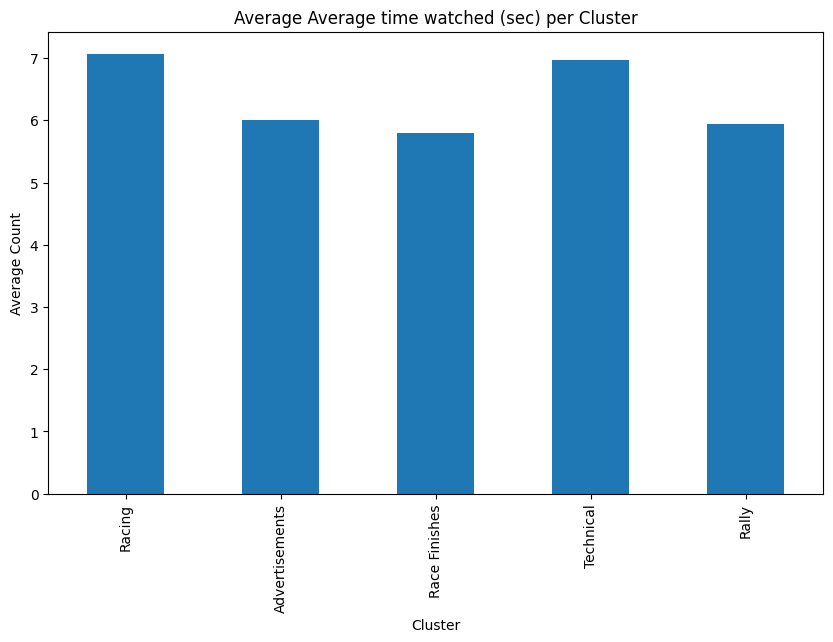

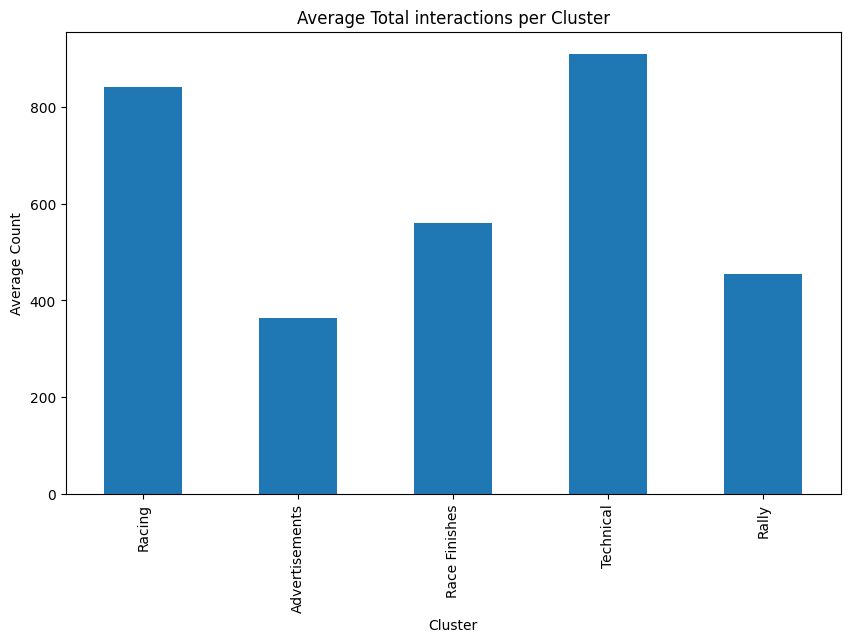

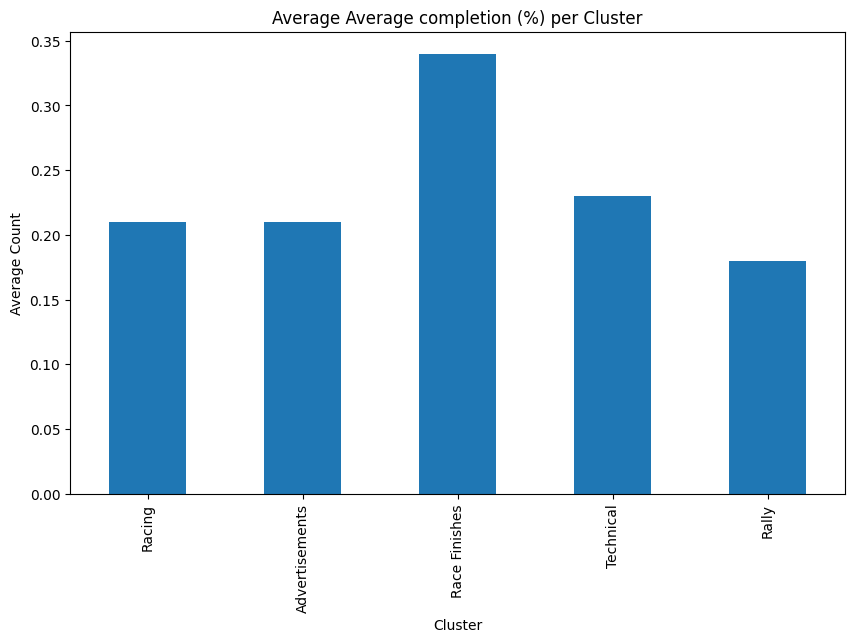

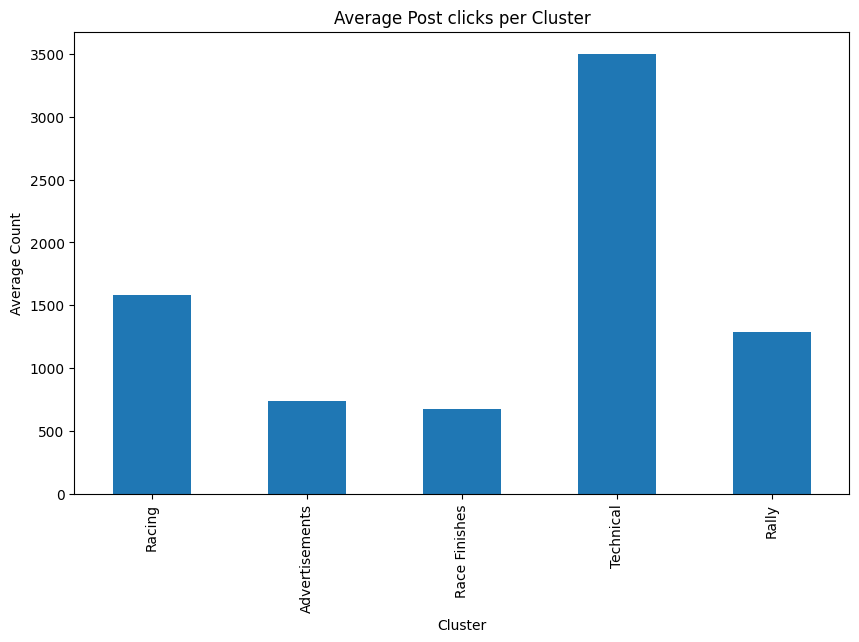

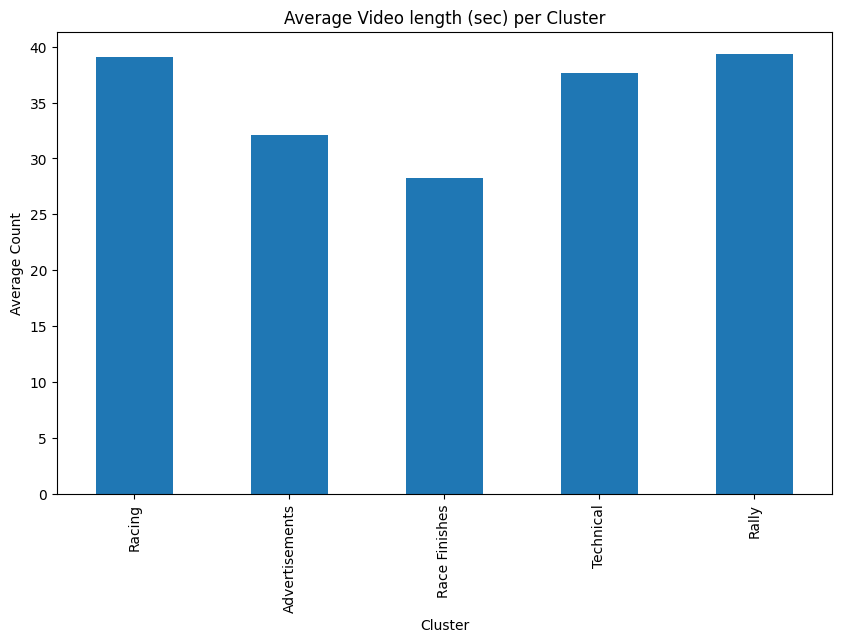

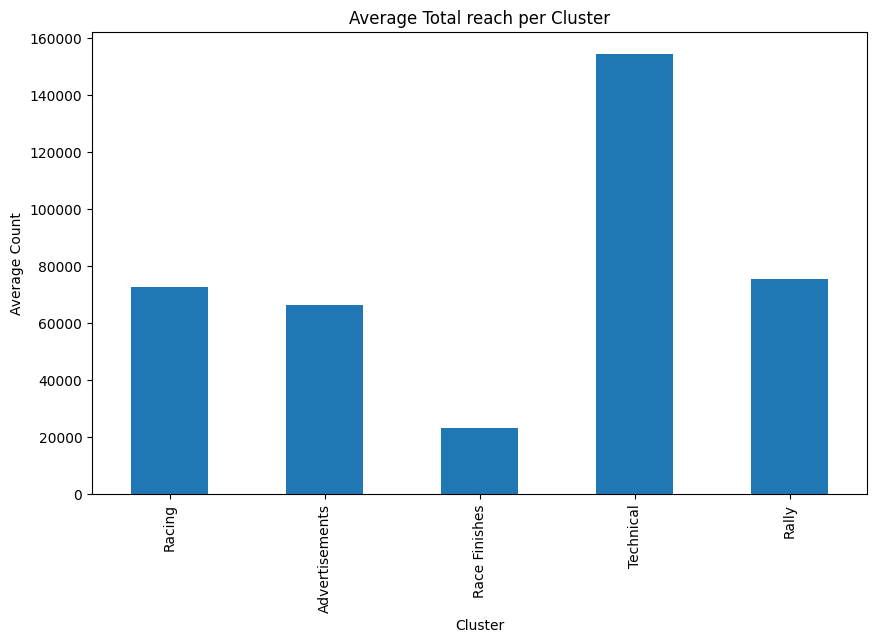

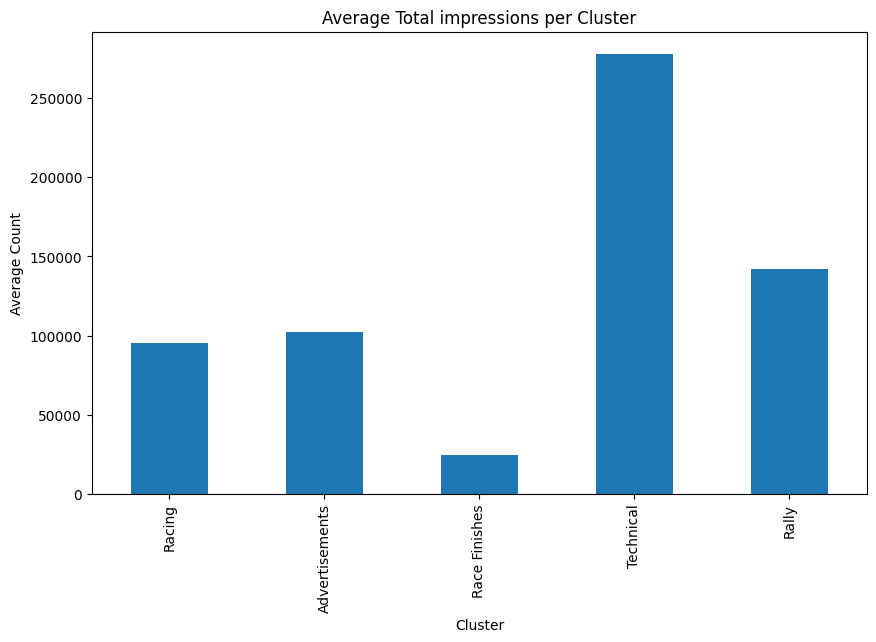

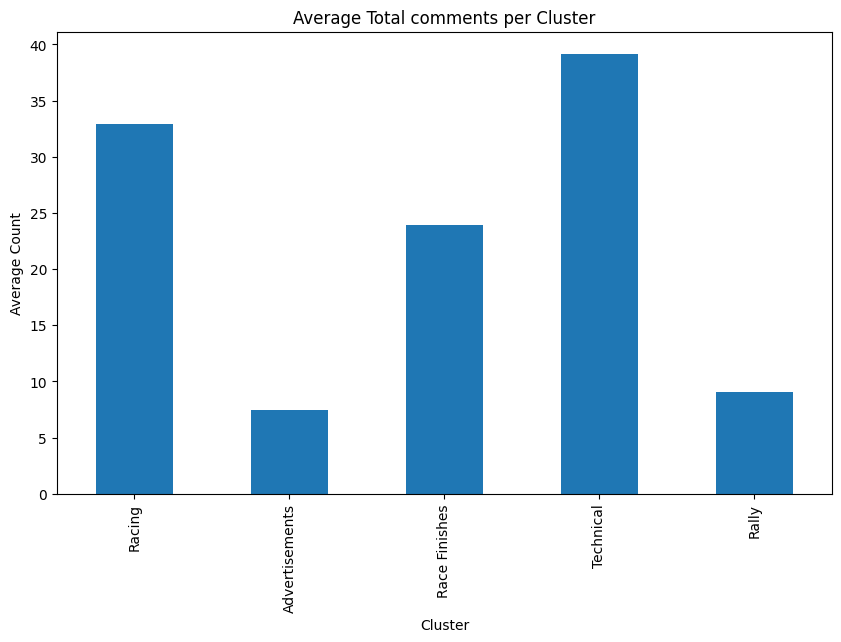

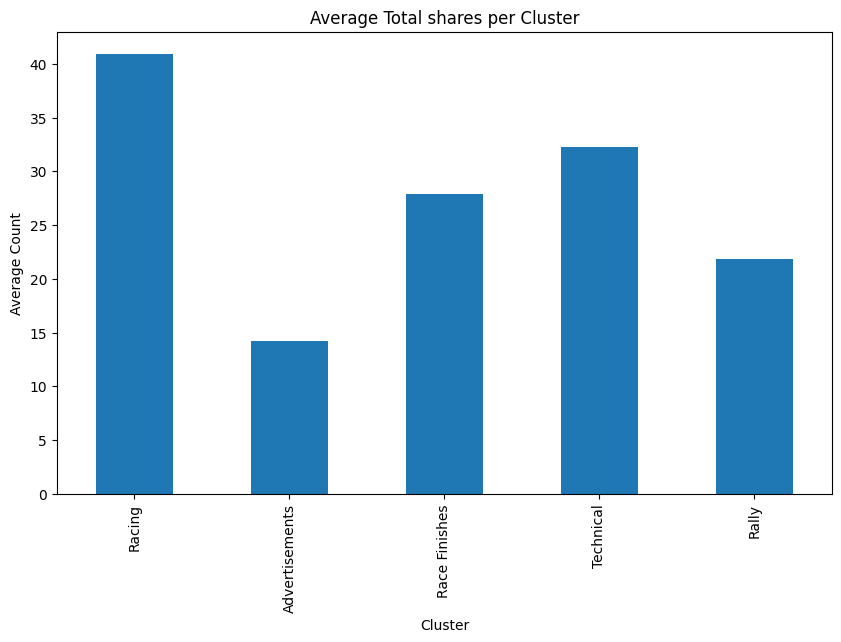

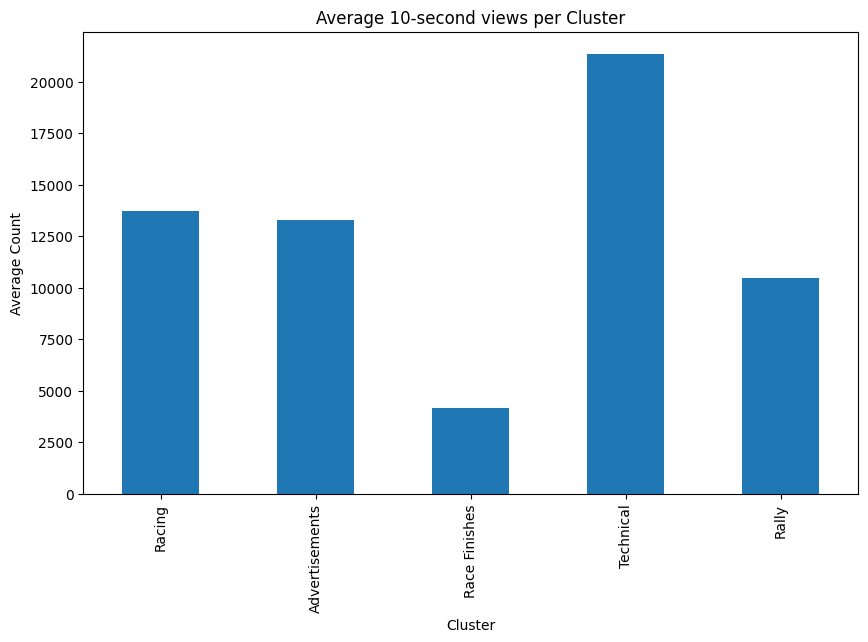

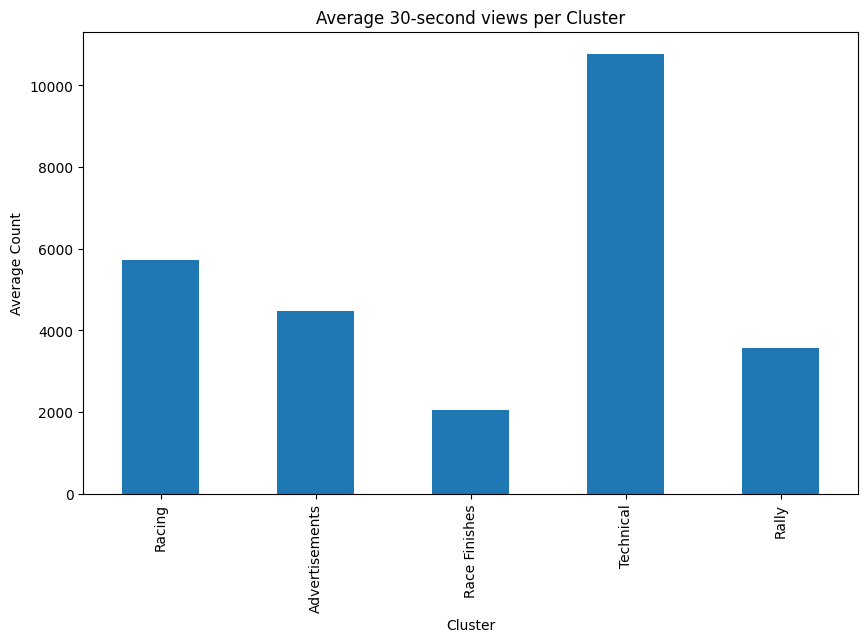

In [42]:
import matplotlib.pyplot as plt

for cluster in cluster_stats.columns:
    plt.figure(figsize=(10, 6))
    cluster_stats[cluster].plot(kind='bar', title=f'Average {cluster} per Cluster')
    plt.ylabel('Average Count')
    plt.xlabel('Cluster')
    plt.xticks(ticks=range(len(cluster_stats.index)), labels=['Racing', 'Advertisements', 'Race Finishes', 'Technical', 'Rally'])
    plt.grid(False)
    plt.show()

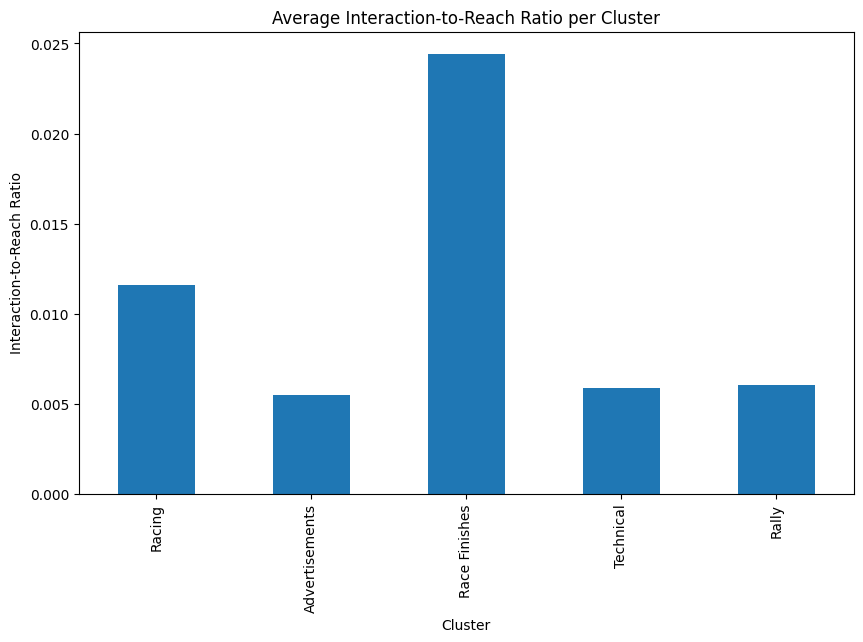

In [43]:
cluster_stats['Interaction-to-Reach Ratio'] = cluster_stats['Total interactions'] / cluster_stats['Total reach']

plt.figure(figsize=(10, 6))
cluster_stats['Interaction-to-Reach Ratio'].plot(kind='bar', title='Average Interaction-to-Reach Ratio per Cluster')
plt.ylabel('Interaction-to-Reach Ratio')
plt.xlabel('Cluster')
plt.xticks(ticks=range(len(cluster_stats.index)), labels=['Racing', 'Advertisements', 'Race Finishes', 'Technical', 'Rally'])
plt.grid(False)
plt.show()

In [44]:
reaction_stats = filtered_dff.groupby('Cluster').agg({
    'Reactions - like': 'mean',
    'Reactions - love': 'mean',
    'Reactions - haha': 'mean',
    'Reactions - wow': 'mean',
    'Reactions - sad': 'mean',
    'Reactions - angry': 'mean'
}).round(2)

print(reaction_stats)


         Reactions - like  Reactions - love  Reactions - haha  \
Cluster                                                         
0                  711.02             48.69              3.49   
1                  331.73              9.88              0.31   
2                  462.14             43.23              1.06   
3                  800.40             34.05              1.30   
4                  409.86             12.23              0.20   

         Reactions - wow  Reactions - sad  Reactions - angry  
Cluster                                                       
0                   4.21             0.49               0.21  
1                   0.73             0.19               0.19  
2                   1.91             0.22               0.10  
3                   3.00             0.28               0.18  
4                   1.00             0.02               0.09  


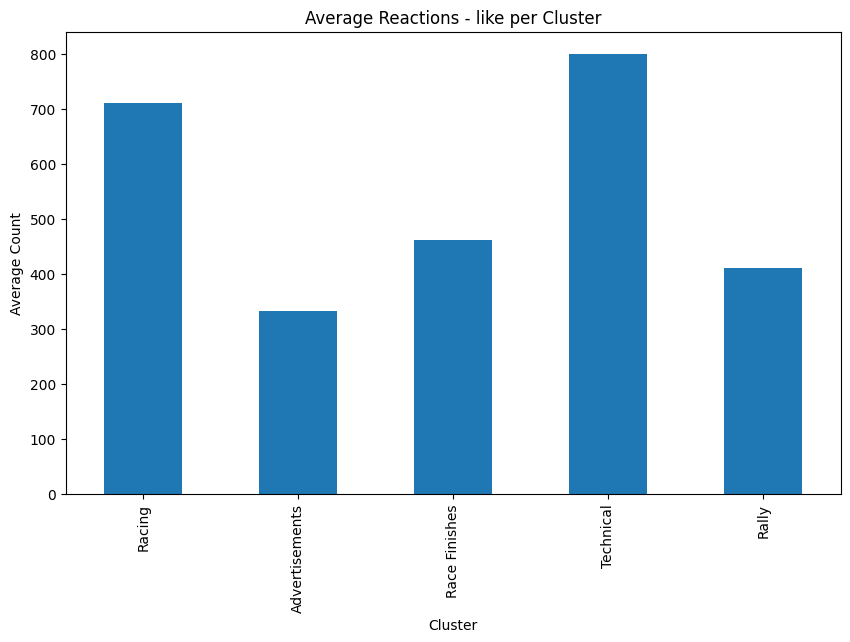

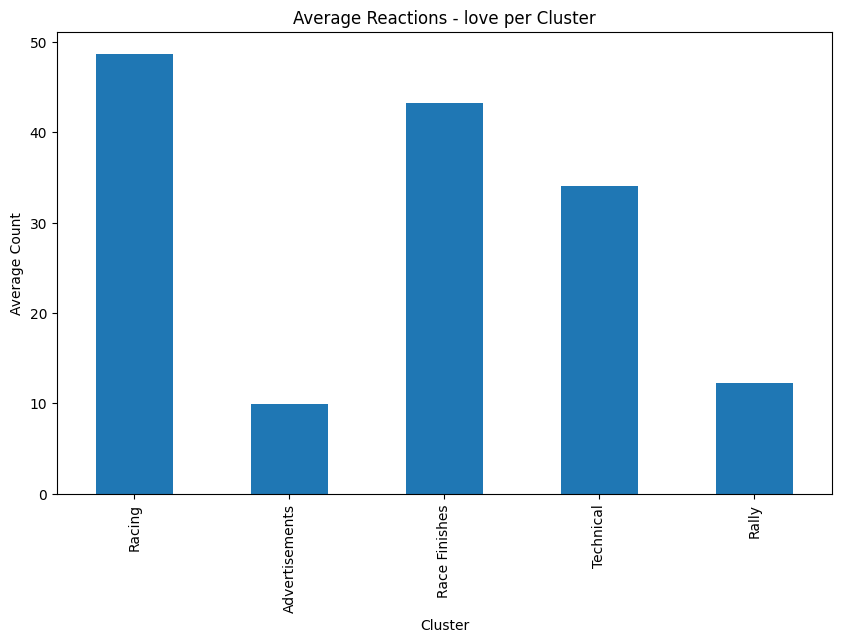

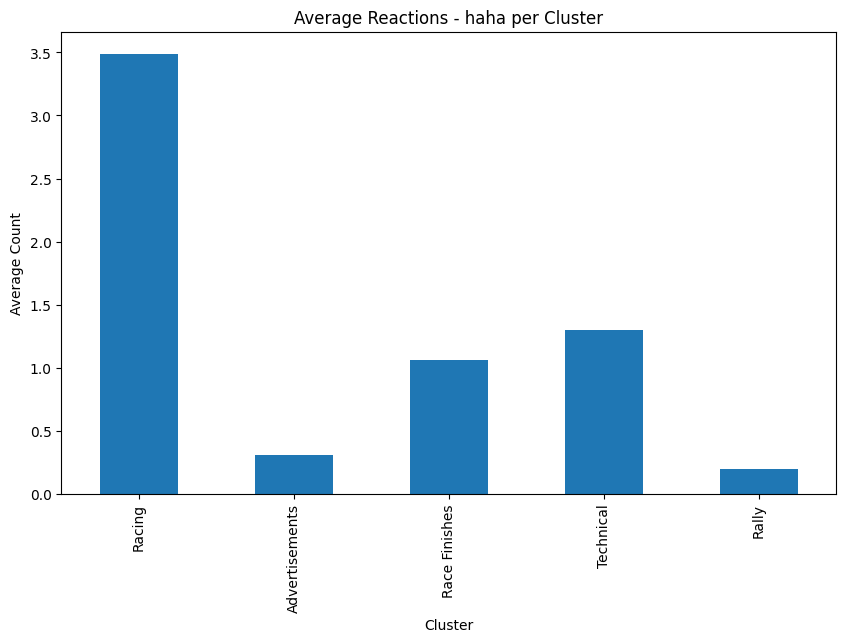

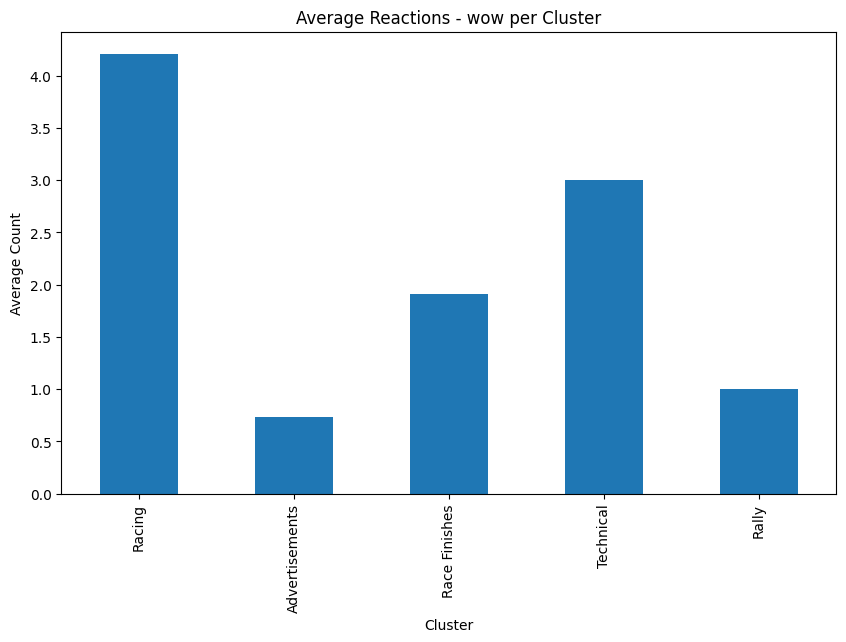

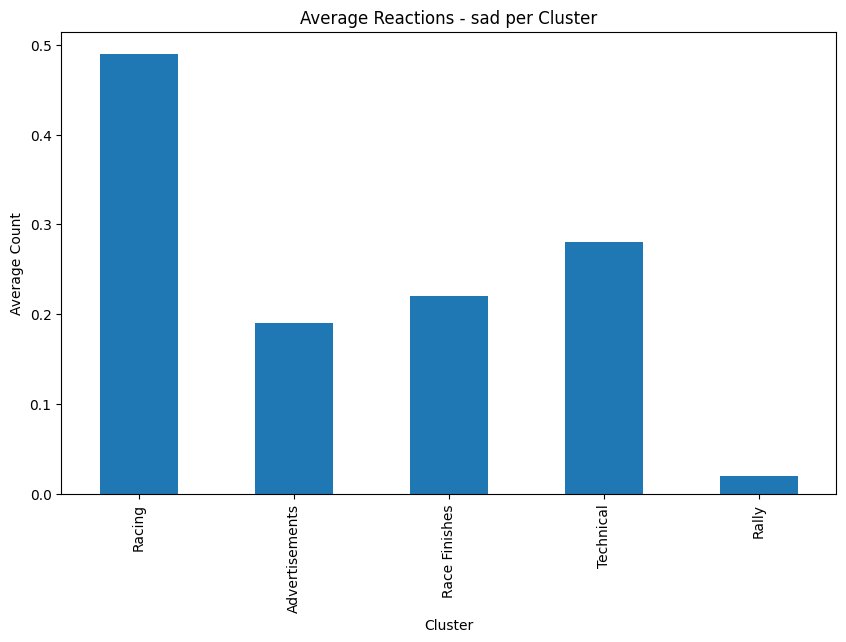

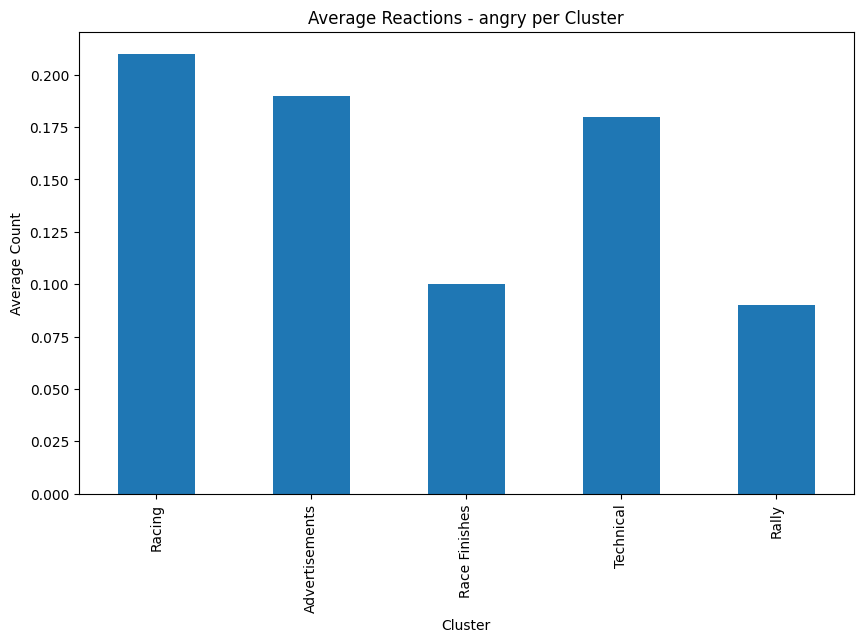

In [45]:
import matplotlib.pyplot as plt

for reaction in reaction_stats.columns:
    plt.figure(figsize=(10, 6))
    reaction_stats[reaction].plot(kind='bar', title=f'Average {reaction} per Cluster')
    plt.ylabel('Average Count')
    plt.xlabel('Cluster')
    plt.xticks(ticks=range(len(cluster_stats.index)), labels=['Racing', 'Advertisements', 'Race Finishes', 'Technical', 'Rally'])
    plt.grid(False)
    plt.show()

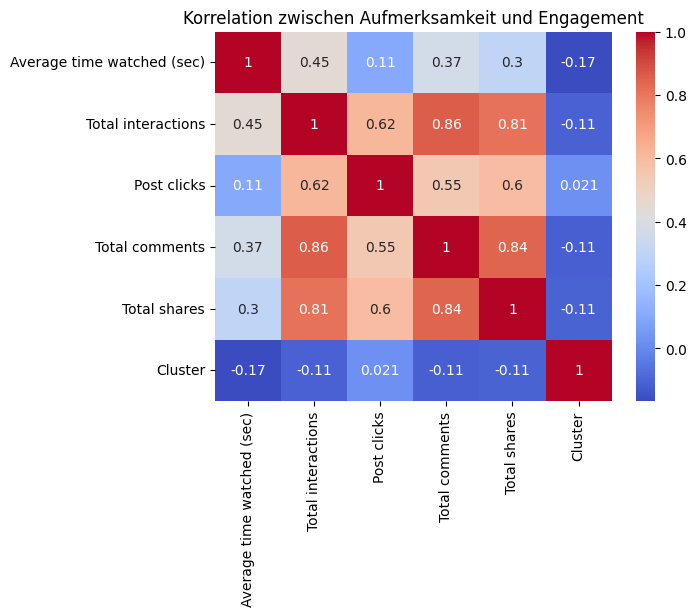

In [46]:
metrics = ['Average time watched (sec)', 'Total interactions', 'Post clicks', 'Total comments', 'Total shares', 'Cluster']
corr = filtered_dff[metrics].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korrelation zwischen Aufmerksamkeit und Engagement')
plt.show()

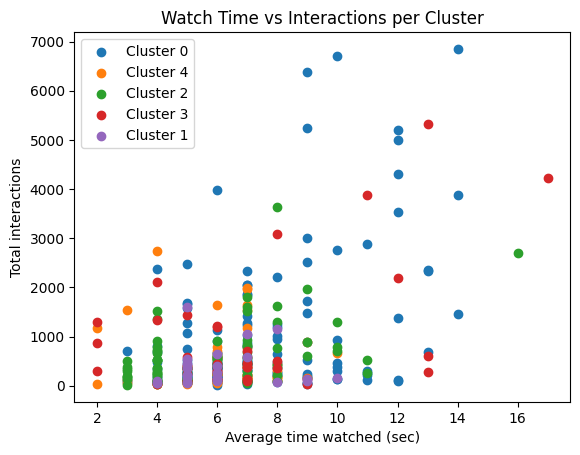

In [47]:
import matplotlib.pyplot as plt

for cluster in filtered_dff['Cluster'].unique():
    subset = filtered_dff[filtered_dff['Cluster'] == cluster]
    plt.scatter(subset['Average time watched (sec)'], subset['Total interactions'], label=f'Cluster {cluster}')

plt.xlabel('Average time watched (sec)')
plt.ylabel('Total interactions')
plt.legend()
plt.title('Watch Time vs Interactions per Cluster')
plt.show()


# Conclusion

In Conclusion, both the time and the Content play a crucial role, when it comes to Attention.

Posts about races and racing driver seem to catch more attention and interactions than other posts, including advertisements etc.

A similar trend is visible for shorter videos. The shorter the video the more views and attentions it seems to attract.
